In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('data/experiment-obs.csv')
df

,tick,j-sidewalk,j-noInView,j-calc,tick.1,j-sidewalk.1,j-noInView.1,j-calc.1,tick.2,j-sidewalk.2,...,j-noInView.98,j-calc.98,tick.99,j-sidewalk.99,j-noInView.99,j-calc.99,tick.100,j-sidewalk.100,j-noInView.100,j-calc.100
0,154573,3,89,0,158028,7,62,0,157243,12,...,0,12,170536,8,0,6,168988,10,0,12


In [4]:
df1=np.split(df, 101,axis=1)

Unexpected exception formatting exception. Falling back to standard exception


/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_8737/1413432241.py", line 1, in <module>
    df1=np.split(df, 101,axis=1)
        ^^^^^^^^^^^^^^^^^^^^^^^^
  File "<__array_function__ internals>", line 200, in split
  File "/opt/conda/lib/python3.11/site-packages/numpy/lib/shape_base.py", line 874, in split
    return array_split(ary, indices_or_sections, axis)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<__array_function__ internals>", line 200, in array_split
  File "/opt/conda/lib/python3.11/site-packages/numpy/lib/shape_base.py", line 786, in array_split
    sary = _nx

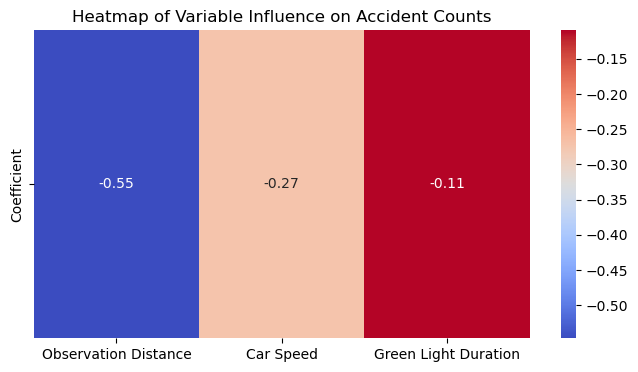

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 示例数据
observation_distance = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
car_speed = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
green_light_duration = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
accident_counts = [80, 60, 45, 30, 20, 15, 10, 8, 6, 5, 3]

# 将自变量列表转换为NumPy数组并进行合并
X = np.array([observation_distance, car_speed, green_light_duration]).T
y = np.array(accident_counts)

# 创建线性回归模型并拟合
model = LinearRegression()
model.fit(X, y)

# 获取回归系数
coefficients = model.coef_

# 创建一个DataFrame来存储变量和其对应的回归系数
variables = ['Observation Distance', 'Car Speed', 'Green Light Duration']
coeff_df = pd.DataFrame(coefficients, index=variables, columns=['Coefficient'])

# 转置DataFrame以便绘制热力图
coeff_df = coeff_df.T

# 绘制热力图
plt.figure(figsize=(8, 4))
sns.heatmap(coeff_df, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Variable Influence on Accident Counts')
plt.show()


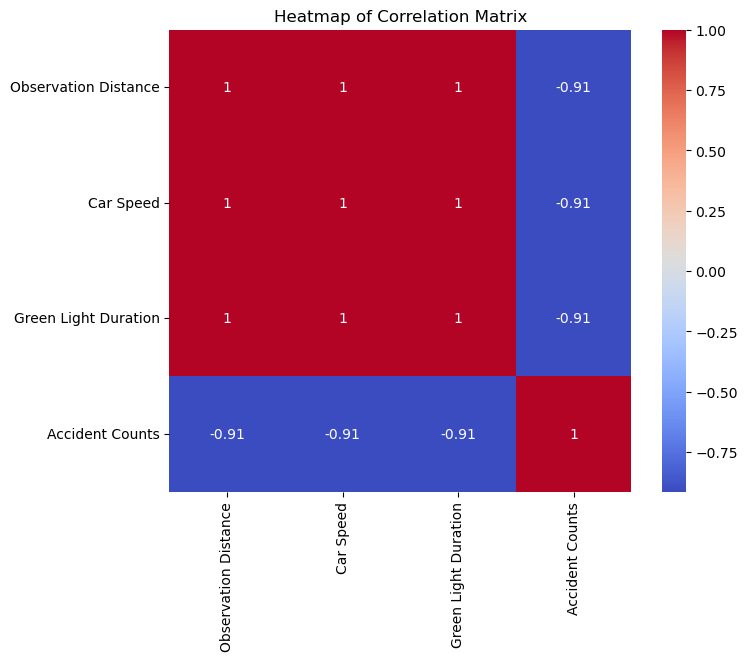

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
data = {
    'Observation Distance': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
    'Car Speed': [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'Green Light Duration': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
    'Accident Counts': [80, 60, 45, 30, 20, 15, 10, 8, 6, 5, 3]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 计算相关性矩阵
correlation_matrix = df.corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


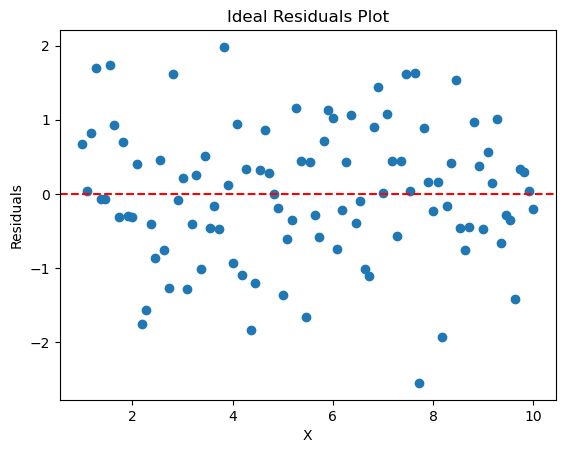

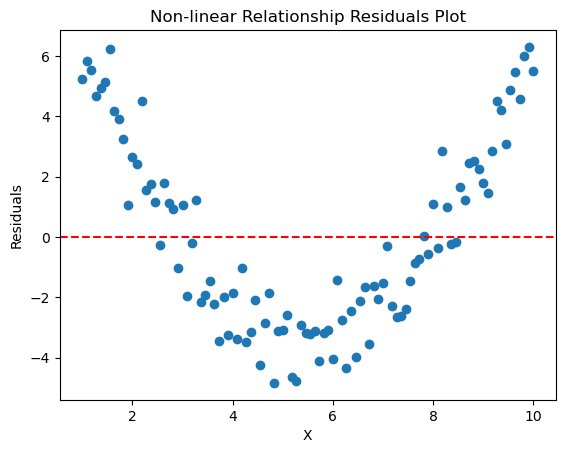

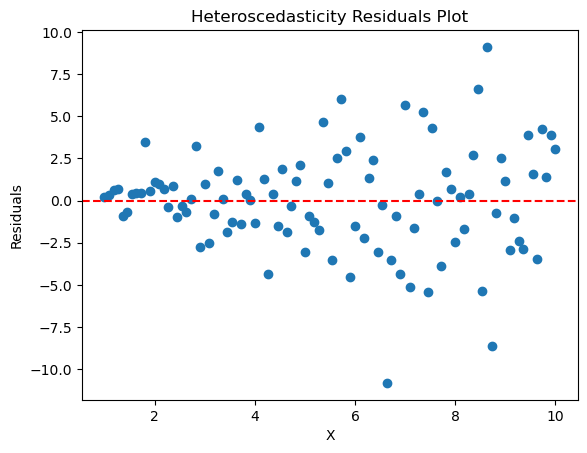

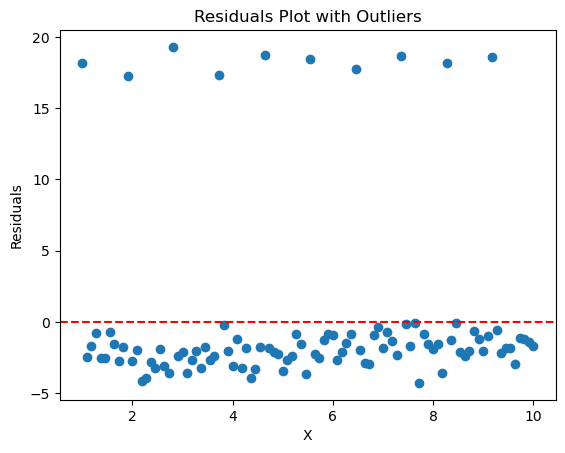

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 生成示例数据
np.random.seed(42)
x = np.linspace(1, 10, 100)
y = 2 * x + np.random.normal(0, 1, 100)  # 线性关系数据

# 生成一个理想的残差图
def plot_residuals(x, y, title):
    x = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    residuals = y - y_pred

    plt.scatter(x, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('X')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.show()

# 理想的残差图
plot_residuals(x, y, "Ideal Residuals Plot")

# 非理想残差图 - 非线性关系
y_non_linear = 2 * x + 0.5 * x**2 + np.random.normal(0, 1, 100)  # 添加非线性项
plot_residuals(x, y_non_linear, "Non-linear Relationship Residuals Plot")

# 非理想残差图 - 异方差性
y_heteroscedasticity = 2 * x + np.random.normal(0, 0.5 * x, 100)  # 残差方差随x增大而增大
plot_residuals(x, y_heteroscedasticity, "Heteroscedasticity Residuals Plot")

# 非理想残差图 - 离群点
y_outliers = np.copy(y)
y_outliers[::10] += 20  # 每隔10个点添加一个离群点
plot_residuals(x, y_outliers, "Residuals Plot with Outliers")


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 构造假设数据集
data = {
    'vehicle_count': [5, 10, 15, 20, 25, 30, 5, 10, 15, 20, 25, 30, 5, 10, 15, 20, 25, 30],
    'speed_limit': [2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8],
    'accident_rate': [0.05, 0.07, 0.12, 0.15, 0.20, 0.25, 0.08, 0.11, 0.18, 0.22, 0.28, 0.35, 0.10, 0.13, 0.20, 0.26, 0.32, 0.40]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 自变量 (X) 和 因变量 (y)
X = df[['vehicle_count', 'speed_limit']]
y = df['accident_rate']

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

# 预测结果
y_pred = model.predict(X)

# 输出回归系数
print("回归系数:", model.coef_)
print("截距:", model.intercept_)

# 评估模型
r2 = r2_score(y, y_pred)
print("R²:", r2)

# 查看拟合后的结果
df['predicted_accident_rate'] = y_pred
print(df)


回归系数: [0.00930541 0.01764564]
截距: -0.07005884555716058
R²: 0.9492232502133702
    vehicle_count  speed_limit  accident_rate  predicted_accident_rate
0               5            2           0.05                 0.011759
1              10            2           0.07                 0.058287
2              15            3           0.12                 0.122459
3              20            3           0.15                 0.168986
4              25            4           0.20                 0.233159
5              30            4           0.25                 0.279686
6               5            5           0.08                 0.064696
7              10            5           0.11                 0.111223
8              15            6           0.18                 0.175396
9              20            6           0.22                 0.221923
10             25            7           0.28                 0.286096
11             30            7           0.35                 0.332623

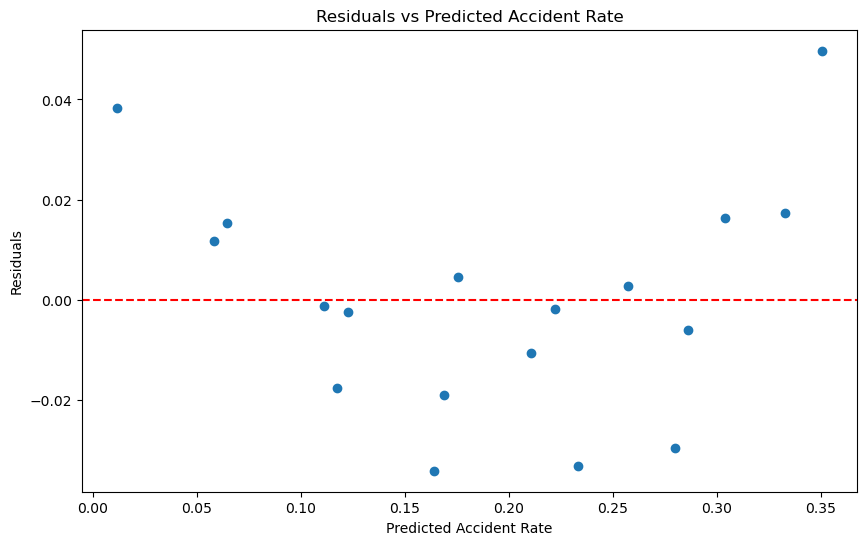

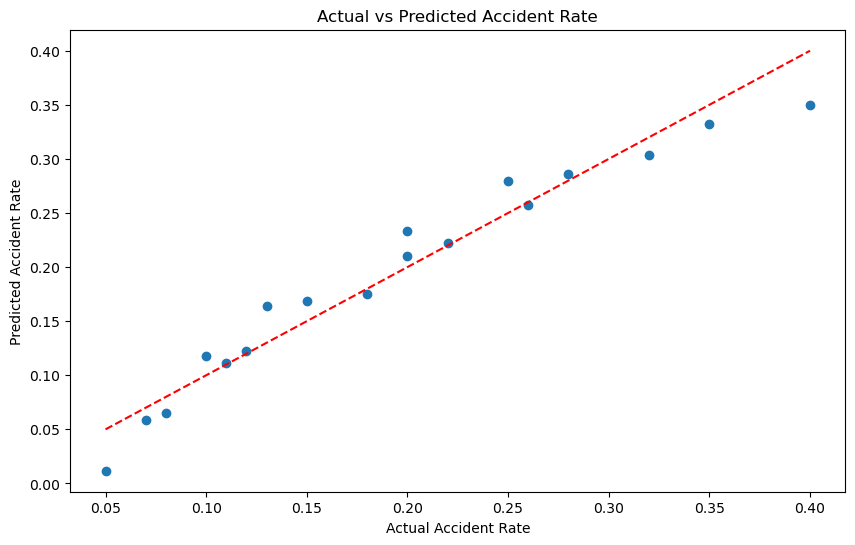

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


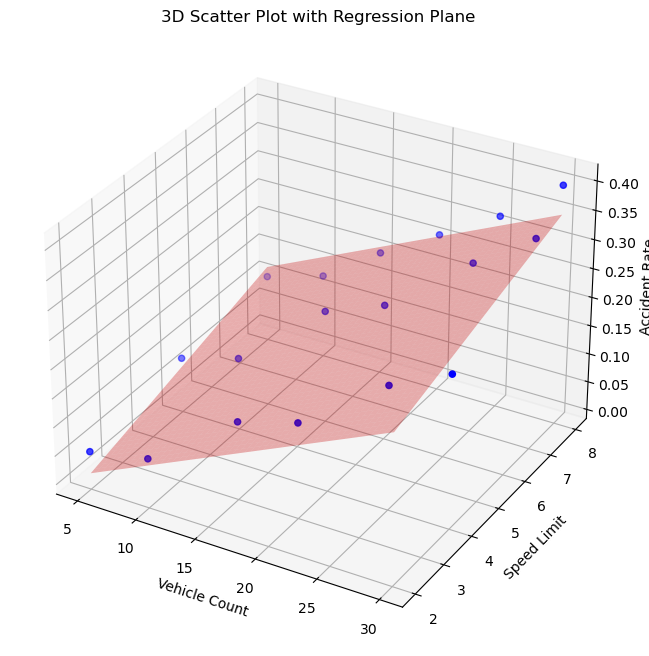

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 构造假设数据集
data = {
    'vehicle_count': [5, 10, 15, 20, 25, 30, 5, 10, 15, 20, 25, 30, 5, 10, 15, 20, 25, 30],
    'speed_limit': [2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8],
    'accident_rate': [0.05, 0.07, 0.12, 0.15, 0.20, 0.25, 0.08, 0.11, 0.18, 0.22, 0.28, 0.35, 0.10, 0.13, 0.20, 0.26, 0.32, 0.40]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 自变量 (X) 和 因变量 (y)
X = df[['vehicle_count', 'speed_limit']]
y = df['accident_rate']

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

# 预测结果
y_pred = model.predict(X)

# 1. 残差图
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Accident Rate')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Accident Rate')
plt.show()

# 2. 实际值 vs 预测值图
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Accident Rate')
plt.ylabel('Predicted Accident Rate')
plt.title('Actual vs Predicted Accident Rate')
plt.show()

# 3. 3D散点图与回归平面
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(df['vehicle_count'], df['speed_limit'], y, color='blue', label='Actual')

# 绘制回归平面
x_surf, y_surf = np.meshgrid(np.linspace(df['vehicle_count'].min(), df['vehicle_count'].max(), 100),
                             np.linspace(df['speed_limit'].min(), df['speed_limit'].max(), 100))
z_surf = model.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel('Vehicle Count')
ax.set_ylabel('Speed Limit')
ax.set_zlabel('Accident Rate')
ax.set_title('3D Scatter Plot with Regression Plane')
plt.show()


回归系数: [1.9        1.56666667]
截距: -2.5
R²: 0.9625730994152046


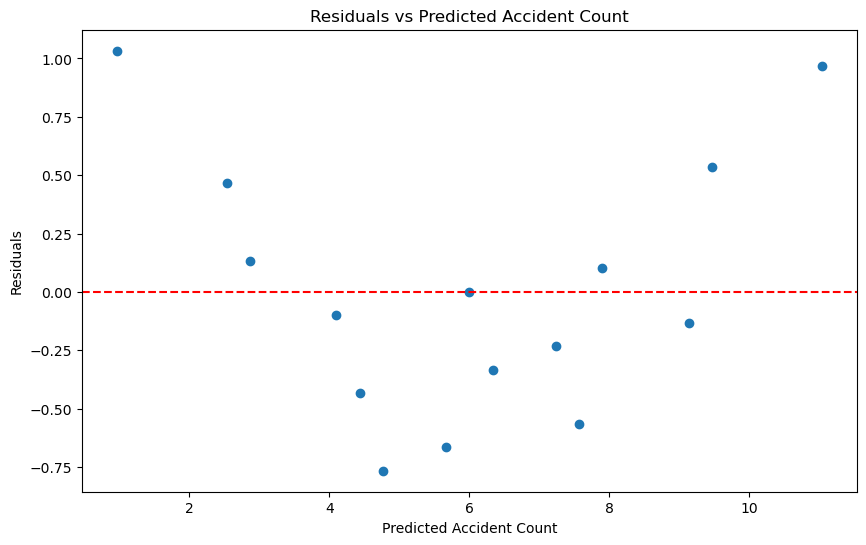

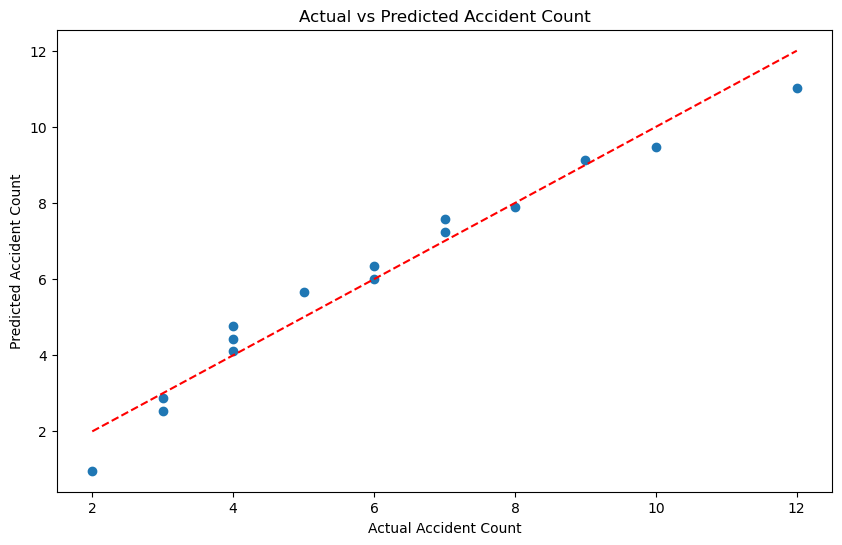

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


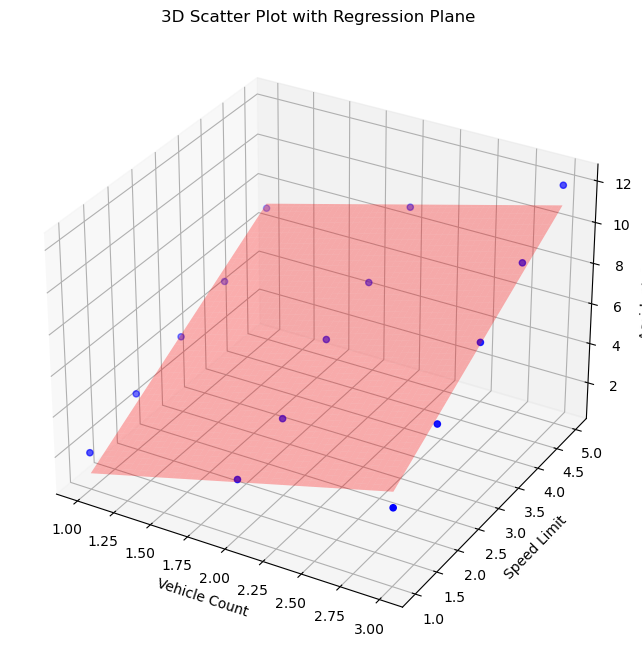

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 构造假设数据集
data = {
    'vehicle_count': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
    'speed_limit': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'accident_count': [2, 3, 4, 5, 7, 3, 4, 6, 7, 9, 4, 6, 8, 10, 12]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 自变量 (X) 和 因变量 (y)
X = df[['vehicle_count', 'speed_limit']]
y = df['accident_count']

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

# 预测结果
y_pred = model.predict(X)

# 输出回归系数
print("回归系数:", model.coef_)
print("截距:", model.intercept_)

# 评估模型
r2 = r2_score(y, y_pred)
print("R²:", r2)

# 1. 残差图
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Accident Count')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Accident Count')
plt.show()

# 2. 实际值 vs 预测值图
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Accident Count')
plt.ylabel('Predicted Accident Count')
plt.title('Actual vs Predicted Accident Count')
plt.show()

# 3. 3D散点图与回归平面
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(df['vehicle_count'], df['speed_limit'], y, color='blue', label='Actual')

# 绘制回归平面
x_surf, y_surf = np.meshgrid(np.linspace(df['vehicle_count'].min(), df['vehicle_count'].max(), 100),
                             np.linspace(df['speed_limit'].min(), df['speed_limit'].max(), 100))
z_surf = model.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel('Vehicle Count')
ax.set_ylabel('Speed Limit')
ax.set_zlabel('Accident Count')
ax.set_title('3D Scatter Plot with Regression Plane')
plt.show()


In [5]:
# 初始化列表
result_list = []

# 设置初始值
start = 1
end = 31
step = 5
repeat = 8

# 生成第一个元素 '8'
result_list.append(8)

# 生成后续的数字列表
for num in range(start, end + 1, step):
    result_list.extend([num] * repeat)

# 打印结果列表
print(result_list)



[8, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 16, 16, 16, 16, 16, 16, 16, 16, 21, 21, 21, 21, 21, 21, 21, 21, 26, 26, 26, 26, 26, 26, 26, 26, 31, 31, 31, 31, 31, 31, 31, 31]
